In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Analysis of the stress test

Make sure that the stress test was executed successfully and the file "results.jsonl" exists.

## Settings of the Stress Test

In [2]:
df = pd.read_csv("./stress_results.csv")
print("Size: {}".format(len(df)))
print("Duration of the test: {:.2f}s".format(df['time'].iloc[-1]))
print("Max Clients: {} (Real: {})".format(df['max_clients'].iloc[0], len(np.unique(df['client']))))
print("Max Containers: {} (Real: {})".format(df['max_containers'].iloc[0], len(np.unique(df['container']))))
delays, delays_count = np.unique(df['delay'], return_counts=True)
print("Delays: {}ms".format(delays))
print("Messages per Delay: {}".format(delays_count))
print("Max Messages: {}".format(df['max_messages'].iloc[0]))
df.head()

Size: 7035
Duration of the test: 256.42s
Max Clients: 7 (Real: 7)
Max Containers: 4 (Real: 4)
Delays: [ 0 25 50]ms
Messages per Delay: [2345 2345 2345]
Max Messages: 50


,time,duration_container,duration_request,client,container,delay,message_id,data_length,current_clients,current_containers,max_clients,max_containers,max_messages
0,1.651485,0.106758,0.239367,0,ZiQgYGZecFXGiZe3AAAJ,0,1,65,1,1,7,4,50
1,1.702401,0.114634,0.289597,0,ZiQgYGZecFXGiZe3AAAJ,0,11,66,1,1,7,4,50
2,1.753319,0.137559,0.339800,0,ZiQgYGZecFXGiZe3AAAJ,0,21,65,1,1,7,4,50
3,2.611217,0.129616,1.196377,0,ZiQgYGZecFXGiZe3AAAJ,0,31,66,2,1,7,4,50
4,2.612421,0.132445,1.196834,0,ZiQgYGZecFXGiZe3AAAJ,0,41,66,2,1,7,4,50


## Statistics

Just print out some basic statistics

In [3]:
print("Duration Container \tmin: {:.3f}ms \tmean: {:.3f}ms \tmax: {:.3f}ms".format(
    np.min(df['duration_container']) * 1000, np.mean(df['duration_container']) * 1000,
    np.max(df['duration_container']) * 1000))
print("Duration Request \tmin: {:.3f}ms \tmean: {:.3f}ms \tmax: {:.3f}ms".format(
    np.min(df['duration_request']) * 1000, np.mean(df['duration_request']) * 1000,
    np.max(df['duration_request']) * 1000))
print("Data Length \t\tmin: {} \tmean: {:.2f} \tmax: {}".format(
    np.min(df['data_length']), np.mean(df['data_length']),
    np.max(df['data_length'])))
print("Messages per Delay {}: {}".format(delays, delays_count))
containers, containers_count = np.unique(df['container'], return_counts=True)
print("Messages per Container {}: {}".format(np.arange(len(containers)) + 1, containers_count))
clients, clients_count = np.unique(df['client'], return_counts=True)
print("Messages per Client {}: {}".format(np.arange(len(clients)) + 1, clients_count))


Duration Container 	min: 7.834ms 	mean: 40.516ms 	max: 253.021ms
Duration Request 	min: 122.540ms 	mean: 4137.244ms 	max: 15255.916ms
Data Length 		min: 63 	mean: 66.35 	max: 67
Messages per Delay [ 0 25 50]: [2345 2345 2345]
Messages per Container [1 2 3 4]: [1499  739 2584 2213]
Messages per Client [1 2 3 4 5 6 7]: [1050 1035 1020 1005  990  975  960]


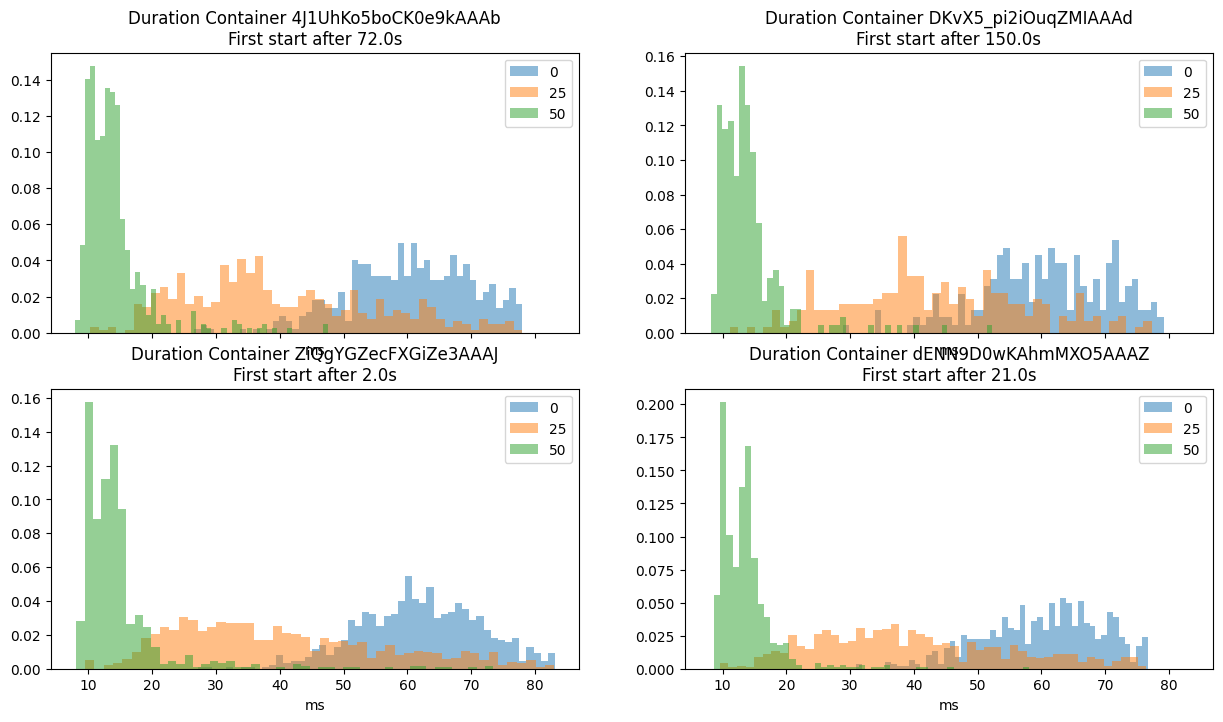

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8), sharex=True, sharey=False)

for i, ax in enumerate(axs.flatten()):
    container_df = df[df['container'] == containers[i]]
    q = container_df["duration_container"].quantile(0.95)

    ax.set_title("Duration Container {}\nFirst start after {}s".format(containers[i], np.round(np.min(container_df['time']))))
    ax.set_xlabel('ms')
    for delay in delays:
        n, bins, patches = ax.hist(container_df['duration_container'][df['duration_container'] < q][container_df['delay']==delay] * 1000, 50, density=True,
                                    alpha=0.50, label=delay)
        ax.legend()

plt.show()

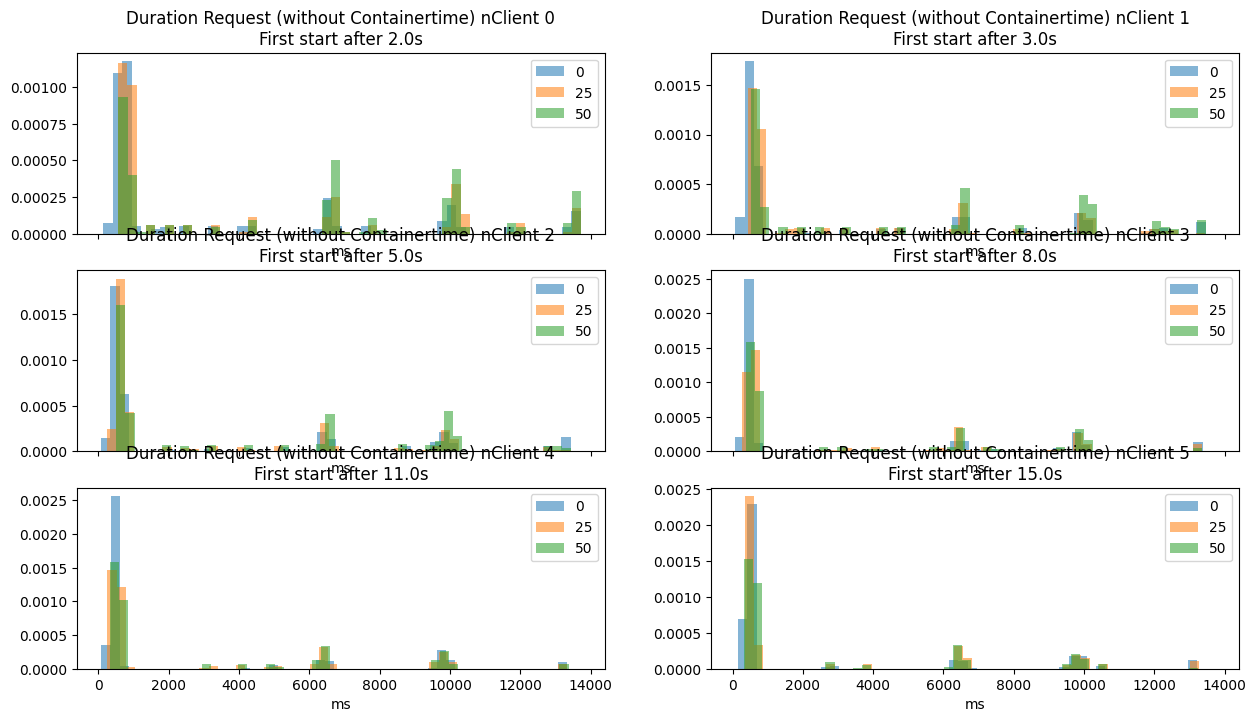

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 8), sharex=True, sharey=False)
df['request_time'] = (df["duration_request"] - df["duration_container"]) * 1000

for i, ax in enumerate(axs.flatten()):
    client_df = df[df['client'] == clients[i]]
    q = client_df["request_time"].quantile(0.90)

    ax.set_title("Duration Request (without Containertime) nClient {}\nFirst start after {}s".format(clients[i], np.round(np.min(client_df['time']))))
    ax.set_xlabel('ms')

    for delay in delays:

        n, bins, patches = ax.hist(client_df['request_time'][client_df['request_time'] < q][client_df['delay']==delay], 50, density=True,
                                alpha=0.55, label=delay)

        ax.legend()

plt.show()